In [18]:
import numpy as np
import pandas as pd

df_dd = pd.read_csv('data/Book_review.csv')

df_dd.describe(include="all")

,ID,text,rating,comments,Text_Len,Positivity,target
count,2808.000000,2808,2808.000000,2808.000000,2808.000000,2808.000000,2808.000000
unique,NaN,2756,NaN,NaN,NaN,NaN,NaN
top,NaN,Excellent,NaN,NaN,NaN,NaN,NaN
freq,NaN,10,NaN,NaN,NaN,NaN,NaN
mean,1404.500000,NaN,4.401709,0.100071,1114.649217,0.197512,0.426638
std,810.744103,NaN,0.988871,0.837932,897.609796,0.163467,0.494677
min,1.000000,NaN,1.000000,0.000000,6.000000,0.000000,0.000000
25%,702.750000,NaN,4.000000,0.000000,593.000000,0.117000,0.000000
50%,1404.500000,NaN,5.000000,0.000000,855.500000,0.164000,0.000000
75%,2106.250000,NaN,5.000000,0.000000,1386.000000,0.219000,1.000000


In [19]:
df_dd.head()

,ID,text,rating,comments,Text_Len,Positivity,target
0,1,I bought this book with the sincere attempt to...,2,0,6978,0.113,1
1,2,The reading experience probably deserves 4 sta...,3,0,6032,0.153,1
2,3,Seraphina Arden is well-known for her scandalo...,3,0,5469,0.132,1
3,4,"This is a great book, featuring two very well-...",4,0,5263,0.119,0
4,5,This book has a lot of interesting things in i...,3,0,5309,0.078,1


In [20]:
df_dd.dtypes

ID              int64
text           object
rating          int64
comments        int64
Text_Len        int64
Positivity    float64
target          int64
dtype: object

In [21]:
X_dd = df_dd[['rating','comments','Text_Len','target']]
y_dd = df_dd['target']

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
Xdd_train, Xdd_val, ydd_train, ydd_val = train_test_split(X_dd,y_dd, test_size = 0.3, random_state=0)

In [24]:
ydd_train.head()

2707    0
2190    1
795     0
743     1
886     1
Name: target, dtype: int64

In [25]:
from sklearn import tree 
from sklearn.tree import export_text
dtreedd = tree.DecisionTreeClassifier(max_depth=4,min_samples_split=30)
dtreedd = dtreedd.fit(Xdd_train,ydd_train)

In [26]:
r = export_text(dtreedd, feature_names=list(Xdd_train.columns.values))
print(r)

|--- target <= 0.50
|   |--- class: 0
|--- target >  0.50
|   |--- class: 1



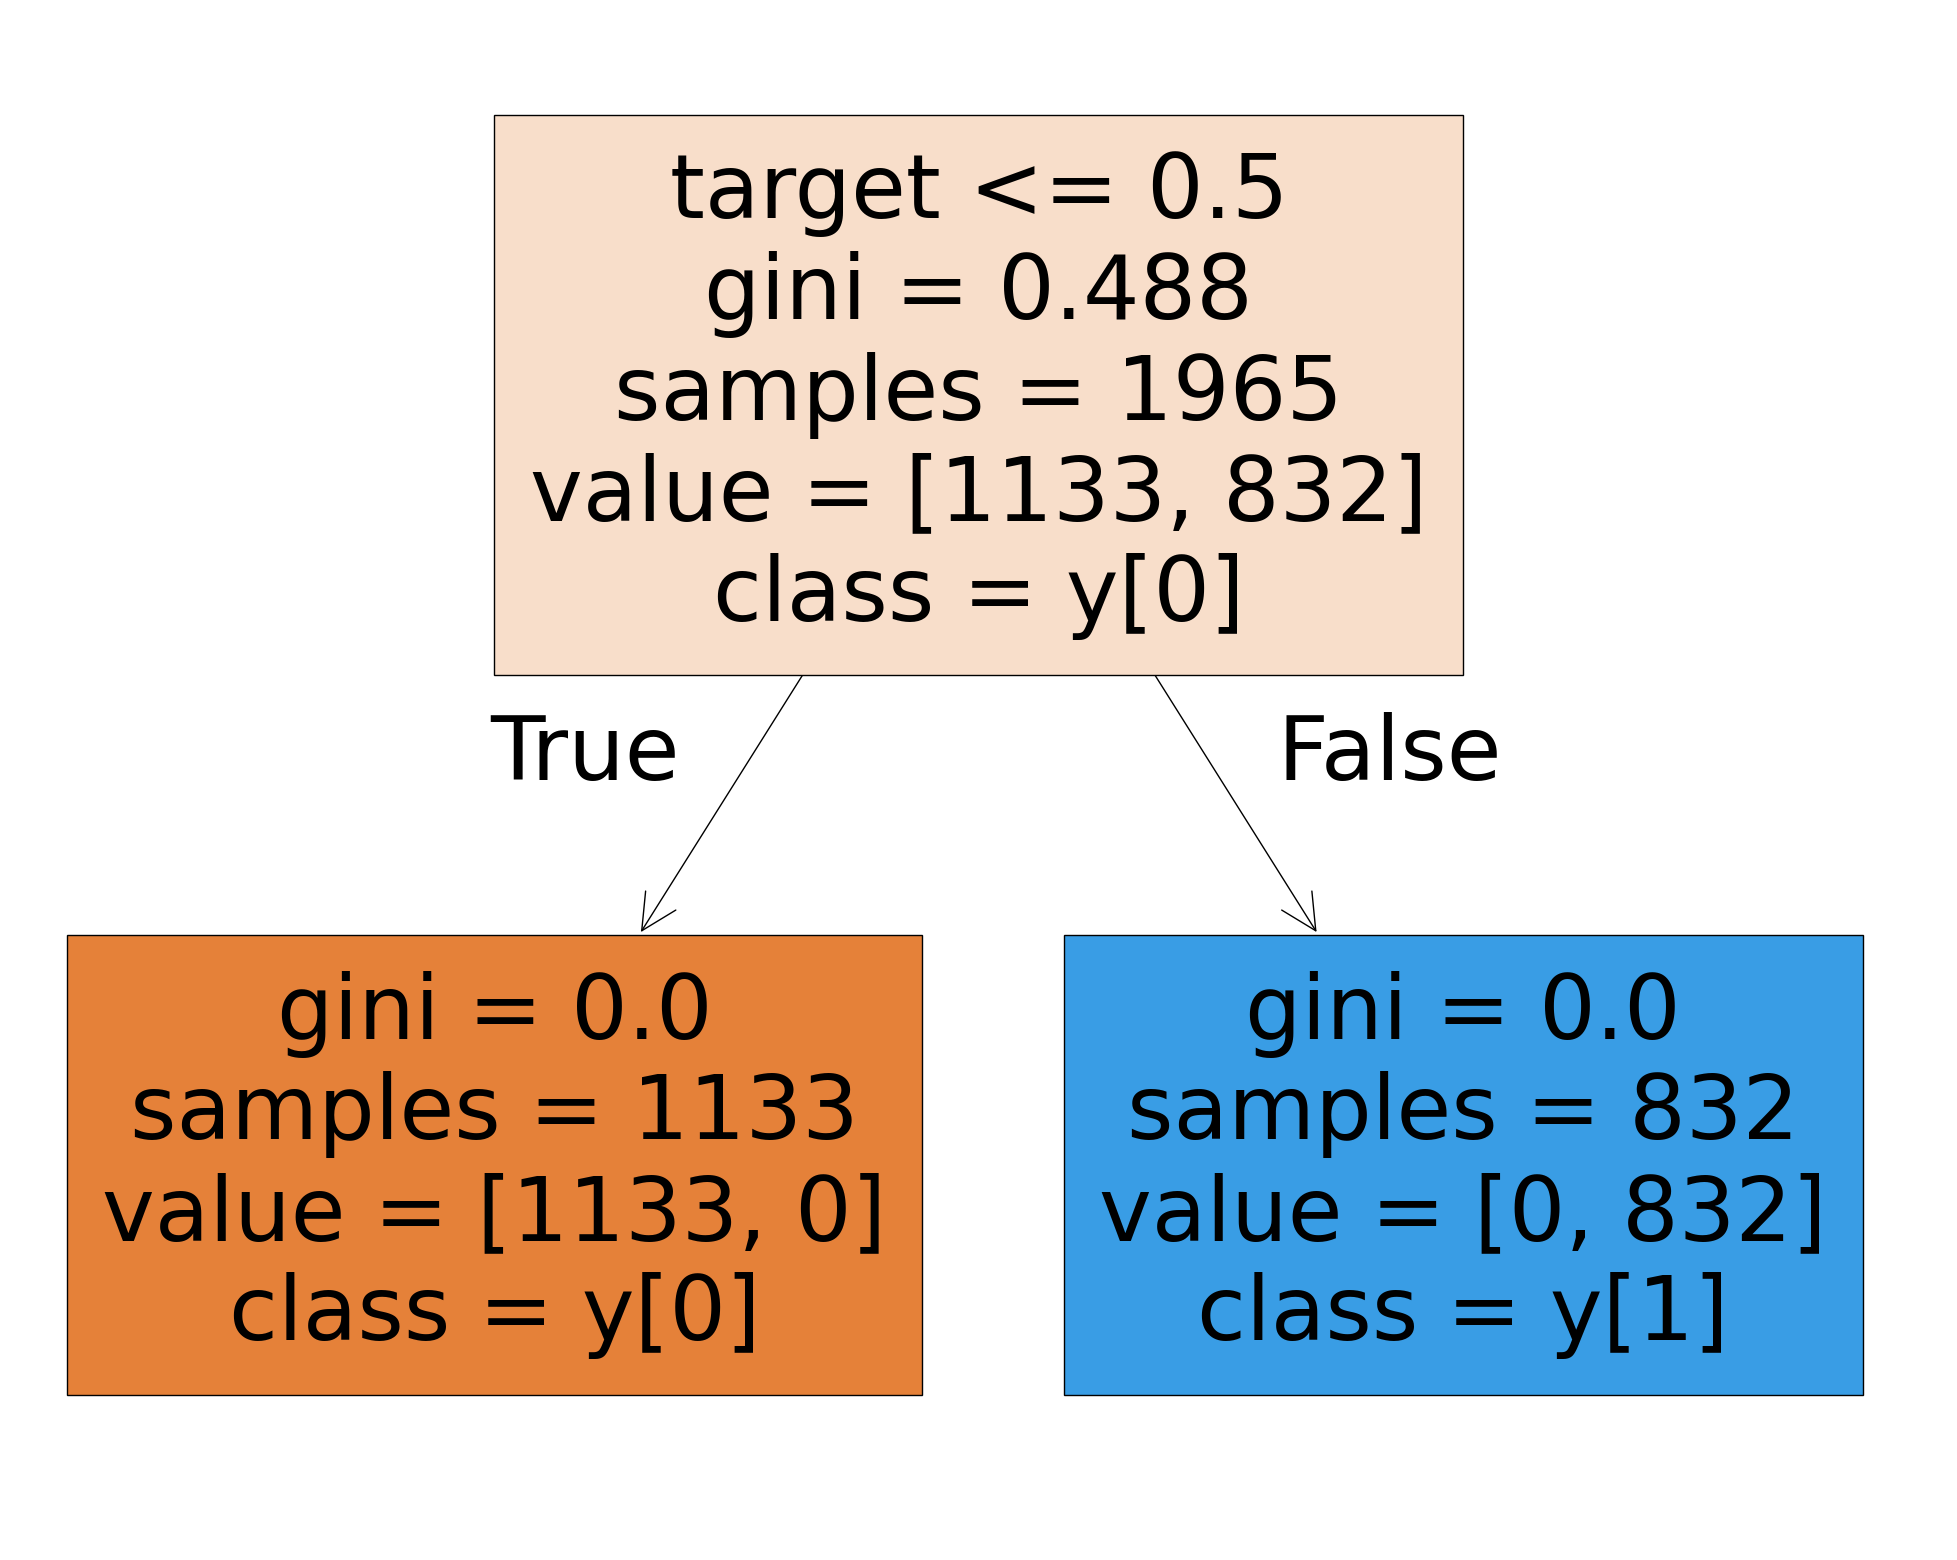

In [27]:
from matplotlib import pyplot as plt 
plt.figure(figsize=[25,20])
tree.plot_tree(dtreedd,
feature_names=list(Xdd_train.columns.values),
class_names=True,
filled=True)
plt.show()

In [29]:
dtreedd.score(Xdd_val,ydd_val)

1.0